# ARIMA (1,0,1)

### Objective: 
Verify and visualize assumptions needed for a baseline ARIMA(1,0,1) model for forecasting log returns, looking at assumptions:
- **Stationarity** - Checked with ADF (unit root) and KPSS (stationarity)
- **Linearity** - AR/MA are linear by design
- **No autocorrelation in residuals** - Checked with Ljung-Box test

### Workflow:  
1. Simple feature cleaning/engineering
2. Stationarity check 
3. PACF/ACF visualisations 

## 1. Simple feature cleaning/engineering

In [2]:
import pandas as pd
import numpy as np

all_dfs = {
    'btcusdt': pd.read_csv('../data/raw_data/crypto_BTCUSDT_1h.csv'),
    'xrpusdt': pd.read_csv('../data/raw_data/crypto_XRPUSDT_1h.csv'),
    'eurusd': pd.read_csv('../data/raw_data/forex_EURUSD_1h.csv'),
    'usdzar': pd.read_csv('../data/raw_data/forex_USDZAR_1h.csv'),
    'msft': pd.read_csv('../data/raw_data/stock_MSFT_1h.csv'),
    'upst': pd.read_csv('../data/raw_data/stock_UPST_1h.csv')
}

def prelim_fe(df):
    timestamp = df.columns[1]                                             # Second column is usually the timestamp                   
    df = df.sort_values(by=timestamp).reset_index(drop=True)
    df = df.drop_duplicates(subset=[timestamp]).reset_index(drop=True)

    df[timestamp] = pd.to_datetime(df[timestamp])
    df['close'] = pd.to_numeric(df['close'], errors='coerce')
    df['log_return'] = np.log(df['close'] / df['close'].shift(1))

    df = df.dropna(subset=['log_return']).reset_index(drop=True)
    return df

processed_dfs = []

for name, df in all_dfs.items():
    all_dfs[name] = prelim_fe(df)

## 2. Stationarity Check

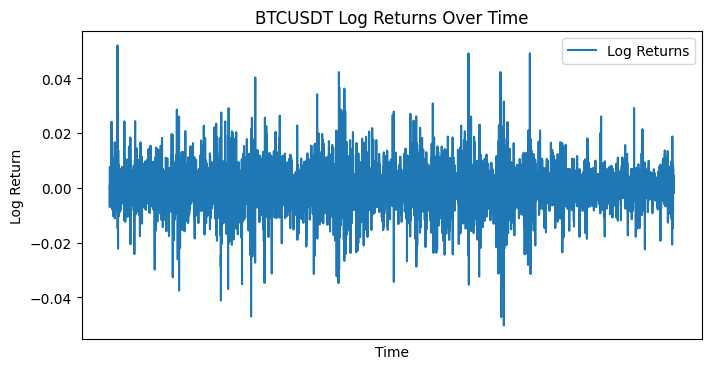

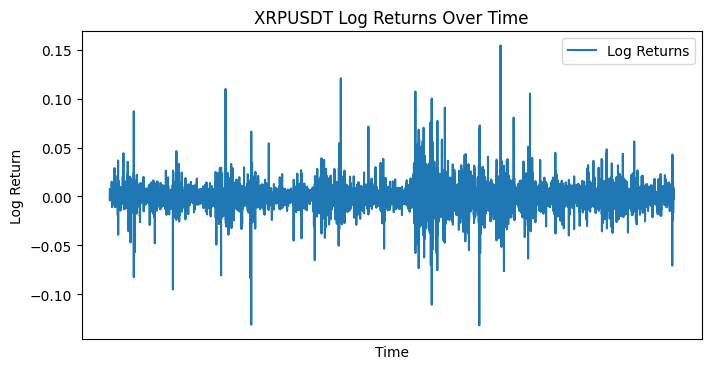

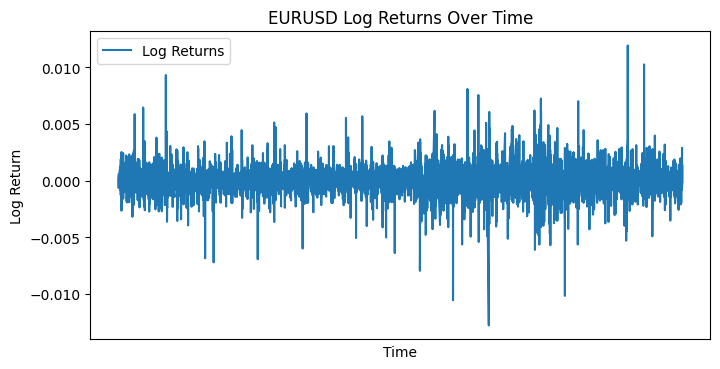

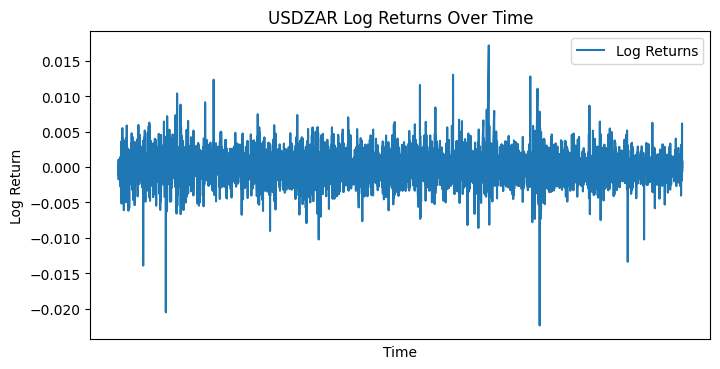

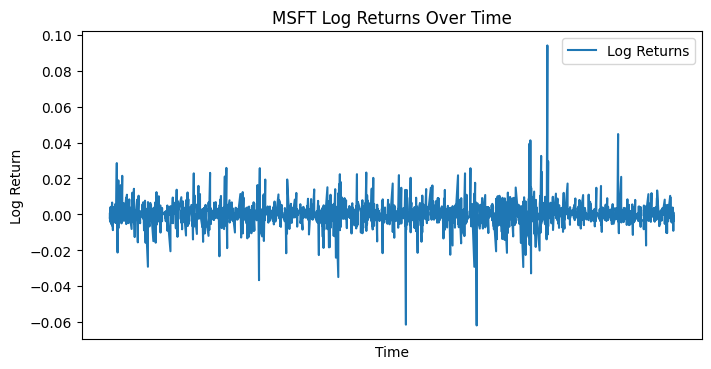

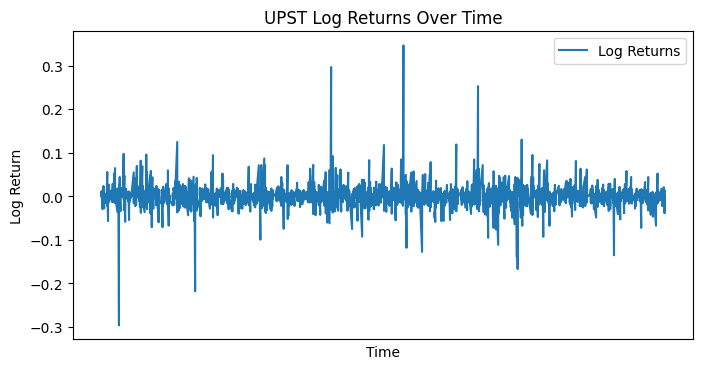

In [5]:
import matplotlib.pyplot as plt

for name, df in all_dfs.items():
    plt.figure(figsize=(8, 4))
    plt.plot(df['timestamp'], df['log_return'], label='Log Returns')
    plt.title(f'{name.upper()} Log Returns Over Time')
    plt.xlabel('Time')
    plt.xticks([])
    plt.ylabel('Log Return')
    plt.legend()
    plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
import warnings
warnings.filterwarnings("ignore")

# ADF Test of Stationarity
print("🔍 Augmented Dickey-Fuller Test:")
print("H0: The series has a unit root (non-stationary)")
print("H1: The series is stationary")
print("-" * 50)

for name, df in all_dfs.items():
    print(f"\n{name.upper()} Series:")
    adf_result = adfuller(df['log_return'])   
    print("ADF Statistic:", adf_result[0])

    if adf_result[1] < 0.05:
        print(f"✅ The series is stationary with p-value {adf_result[1]} (reject H0)\n")
    else:
        print(f"❌ The series is non-stationary with p-value {adf_result[1]} (fail to reject H0)\n")


# KPSS Test of Stationarity
print("=" * 50 ,"\n🔍 Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test:")
print("H0: The series is stationary")  
print("H1: The series has a unit root (non-stationary)")
print("-" * 50)

for name, df in all_dfs.items():
    print(f"\n{name.upper()} Series:")
    kpss_result = kpss(df['log_return'], regression='c', nlags="auto")  
    print("KPSS Statistic:", kpss_result[0])  

    if kpss_result[1] < 0.05:
        print(f"❌ The series is non-stationary with p-value {kpss_result[1]} (reject H0)\n")  
    else:
        print(f"✅ The series is stationary with p-value {kpss_result[1]} (fail to reject H0)\n")

🔍 Augmented Dickey-Fuller Test:
H0: The series has a unit root (non-stationary)
H1: The series is stationary
--------------------------------------------------

BTCUSDT Series:
ADF Statistic: -29.358640640477702
✅ The series is stationary with p-value 0.0 (reject H0)


XRPUSDT Series:
ADF Statistic: -25.987248489388286
✅ The series is stationary with p-value 0.0 (reject H0)


EURUSD Series:
ADF Statistic: -21.693778895028434
✅ The series is stationary with p-value 0.0 (reject H0)


USDZAR Series:
ADF Statistic: -66.85375714806597
✅ The series is stationary with p-value 0.0 (reject H0)


MSFT Series:
ADF Statistic: -59.060506758363495
✅ The series is stationary with p-value 0.0 (reject H0)


UPST Series:
ADF Statistic: -21.00860628294539
✅ The series is stationary with p-value 0.0 (reject H0)

🔍 Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test:
H0: The series is stationary
H1: The series has a unit root (non-stationary)
--------------------------------------------------

BTCUSDT Series:
KP

## 3. PACF/ACF diagnosis for p/q selection 


Analyzing BTCUSDT:


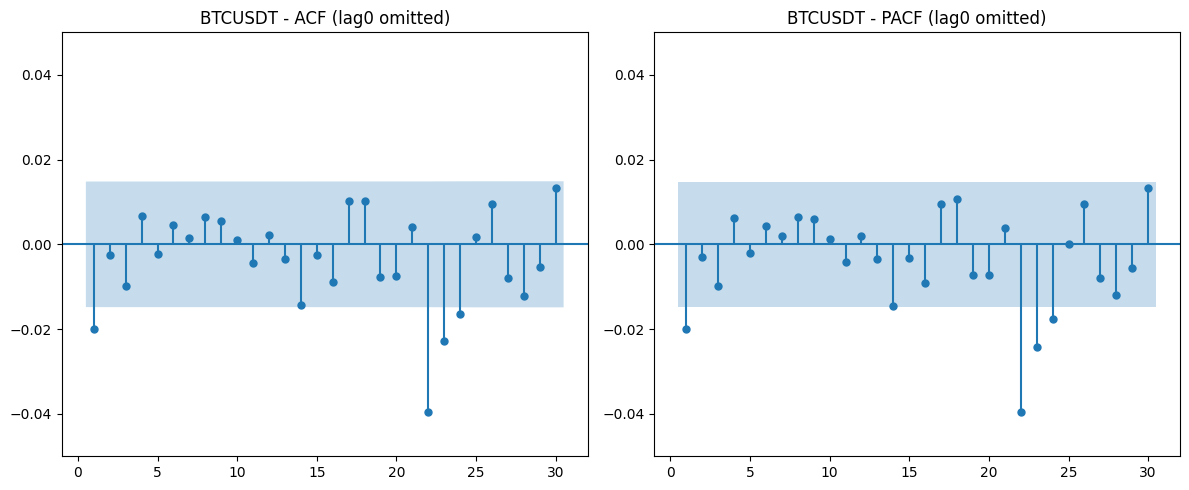

N=17511, 95% conf bound ≈ ±0.01481

Significant ACF lags (>|conf|): [1, 22, 23, 24]
Significant PACF lags (>|conf|): [1, 22, 23, 24]

Ljung-Box test (lags 5,10,20):
      lb_stat  lb_pvalue
5    9.559610   0.088720
10  11.238969   0.339206
20  22.632971   0.307174

Analyzing XRPUSDT:


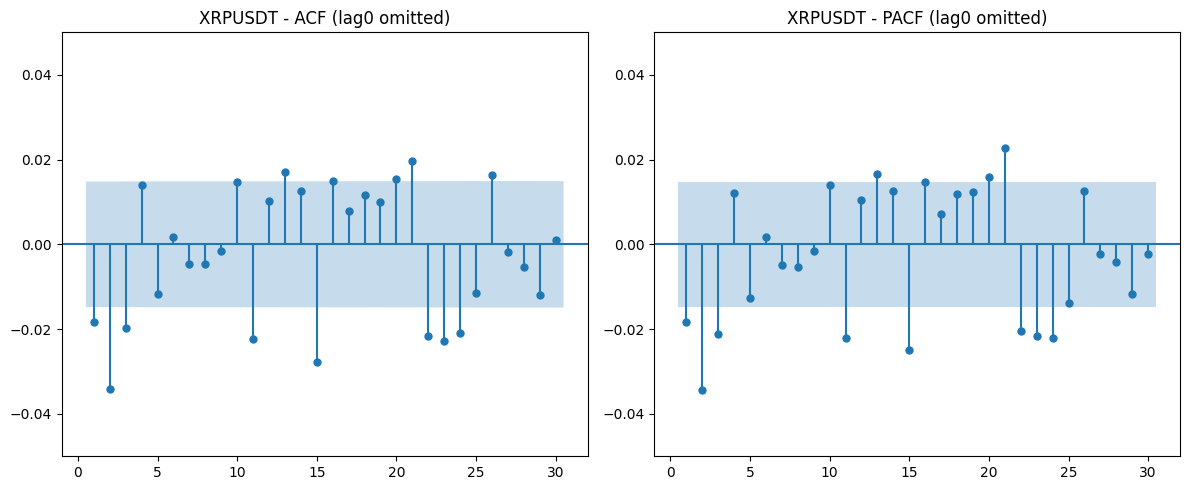

N=17511, 95% conf bound ≈ ±0.01481

Significant ACF lags (>|conf|): [1, 2, 3, 11, 13, 15, 16, 20, 21, 22, 23, 24, 26]
Significant PACF lags (>|conf|): [1, 2, 3, 11, 13, 15, 20, 21, 22, 23, 24]

Ljung-Box test (lags 5,10,20):
      lb_stat     lb_pvalue
5   38.818228  2.583532e-07
10  43.423571  4.176527e-06
20  88.639105  1.280898e-10

Analyzing EURUSD:


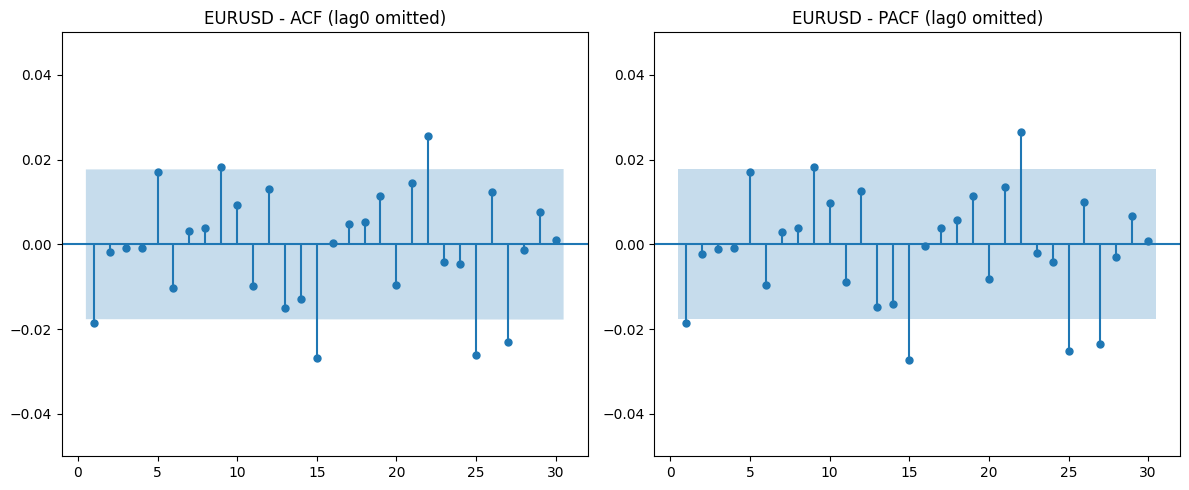

N=12312, 95% conf bound ≈ ±0.01766

Significant ACF lags (>|conf|): [1, 9, 15, 22, 25, 27]
Significant PACF lags (>|conf|): [1, 9, 15, 22, 25, 27]

Ljung-Box test (lags 5,10,20):
      lb_stat  lb_pvalue
5    7.953349   0.158825
10  14.711228   0.142950
20  34.990306   0.020156

Analyzing USDZAR:


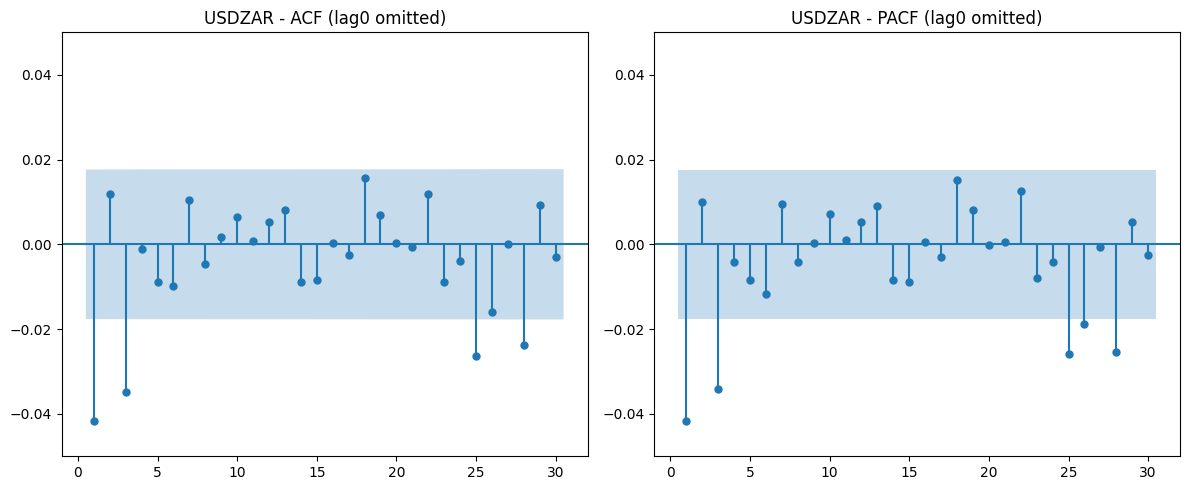

N=12362, 95% conf bound ≈ ±0.01763

Significant ACF lags (>|conf|): [1, 3, 25, 28]
Significant PACF lags (>|conf|): [1, 3, 25, 26, 28]

Ljung-Box test (lags 5,10,20):
      lb_stat     lb_pvalue
5   39.101326  2.265882e-07
10  42.458658  6.212745e-06
20  49.155254  2.922470e-04

Analyzing MSFT:


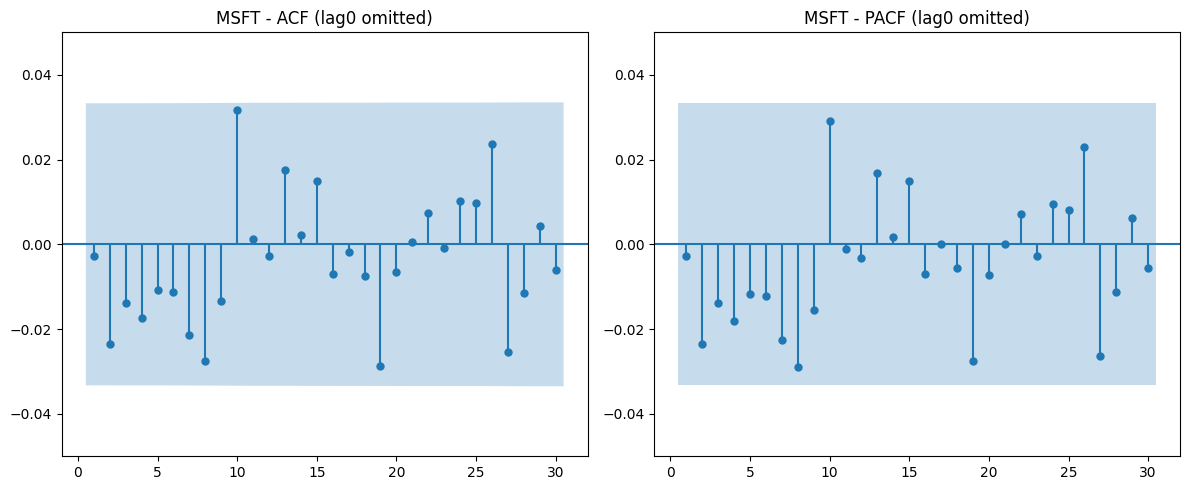

N=3472, 95% conf bound ≈ ±0.03326

Significant ACF lags (>|conf|): None
Significant PACF lags (>|conf|): None

Ljung-Box test (lags 5,10,20):
      lb_stat  lb_pvalue
5    4.057719   0.541136
10  12.855933   0.231839
20  18.204697   0.573926

Analyzing UPST:


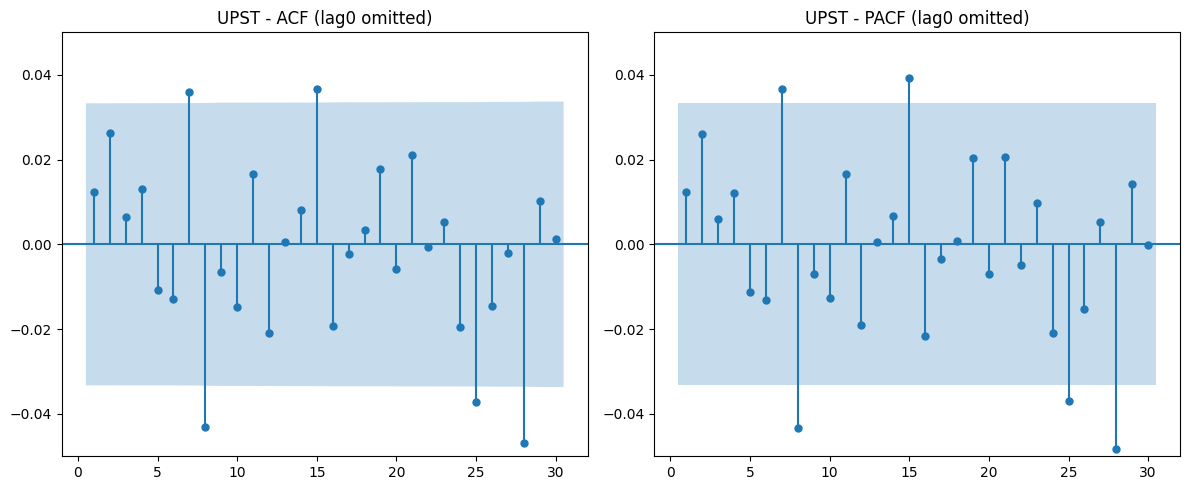

N=3472, 95% conf bound ≈ ±0.03326

Significant ACF lags (>|conf|): [7, 8, 15, 25, 28]
Significant PACF lags (>|conf|): [7, 8, 15, 25, 28]

Ljung-Box test (lags 5,10,20):
      lb_stat  lb_pvalue
5    4.051295   0.542055
10  16.481167   0.086662
20  26.490466   0.150217


In [9]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

def analyze_time_series(data, asset, nlags = 30, conf = 1.96):
    """
    Function to compute & plot ACF, PACF, and Ljuing-Box test for p/q in ARIMA model.

    Args:
        data (pd.Series): Time series data to analyze.
        nlags (int): Number of lags to compute for ACF and PACF.
        conf (float): Confidence interval multiplier.
    """
    y = data.dropna()
    n = len(y)

    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plot_acf(y, lags=nlags, ax=plt.gca(), zero=False)
    plt.ylim(-0.05, 0.05)
    plt.title(f'{asset} - ACF (lag0 omitted)')

    plt.subplot(1,2,2)
    plot_pacf(y, lags=nlags, ax=plt.gca(), zero=False, method='ywm')
    plt.ylim(-0.05, 0.05)
    plt.title(f'{asset} - PACF (lag0 omitted)')

    plt.tight_layout()
    plt.show()

    acf_vals = acf(y.values, nlags=nlags, fft=True)
    pacf_vals = pacf(y.values, nlags=nlags, method='ywm')

    conf_bound = conf / np.sqrt(n)
    print(f"N={n}, 95% conf bound ≈ ±{conf_bound:.5f}\n")

    sign_acf = [k for k, v in enumerate(acf_vals) if k>0 and abs(v) > conf_bound]
    sign_pacf = [k for k, v in enumerate(pacf_vals) if k>0 and abs(v) > conf_bound]

    print("Significant ACF lags (>|conf|):", sign_acf or "None")
    print("Significant PACF lags (>|conf|):", sign_pacf or "None")

    print("\nLjung-Box test (lags 5,10,20):")
    print(acorr_ljungbox(y.values, lags=[5,10,20], return_df=True))


for name, df in all_dfs.items():
    print(f"\nAnalyzing {name.upper()}:")
    y = df['log_return']
    analyze_time_series(y, asset= name.upper())

## 4. Modelling and Results

In [ ]:
from src.utils.timesplit_utils import ExpandingSplit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

test_ratio = 0.1
step_ratio = test_ratio

all_splits_errors ={}

for name, df in all_dfs.items():
    print(f"Processing {name.upper()}")

    y = df['log_return'].dropna().reset_index(drop=True)
    n = len(y)
    test_size = int(n * test_ratio)
    step_size = int(n * step_ratio)

    splitter = ExpandingSplit(test_size=test_size, step_size=step_size)

    splits_errors = []     # errors for each test split

    for train_idx, test_idx in splitter.split(y):
        y_train, y_test = y[train_idx], y[test_idx]

        model = ARIMA(y_train, order=(1,0,1))
        model_fit = model.fit()

        y_pred = model_fit.forecast(steps=len(y_test))
        error = y_pred.values - y_test.values
        splits_errors.append(error)

    all_splits_errors[name] = splits_errors


for name, splits in all_splits_errors.items():
    plt.figure(figsize=(12,5))
    for i, error in enumerate(splits):
        plt.plot(error, label=f"Split {i+1}", alpha=0.7)
    plt.title(f"ARIMA(1,0,1) Forecast Errors for {name.upper()}")
    plt.xlabel("Test index within split")
    plt.ylabel("Error (y_pred - y_test)")
    plt.legend()
    plt.grid(True)
    plt.show()